In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import scaleogram.lib.scaleogram as scg 
import pywt

# choose default wavelet function for the entire notebook - complex morlet
scg.set_default_wavelet('cmor1-1.5')


Default wavelet function used to compute the transform: cmor1-1.5 ( Complex Morlet wavelets )


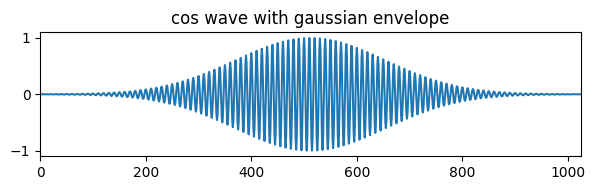

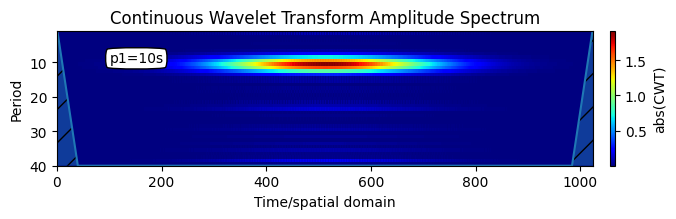

In [14]:
# let consider a timeline with 1 sample / second
ns   = 1024
time = np.arange(ns)

# and a range of scales to perform the transform
scales = scg.periods2scales( np.arange(1, 40) )

# and a periodic signal with varying amplitude
p1=10; periodic1 = np.cos(2*np.pi/p1*time) * np.exp(-((time-ns/2)/200)**2)

# plot the signal 
fig1, ax1 = plt.subplots(1, 1, figsize=(6.2,2));  
lines = ax1.plot(periodic1); 
ax1.set_xlim(0, len(time))
ax1.set_title("cos wave with gaussian envelope")
fig1.tight_layout()

# and the scaleogram
ax2 = scg.cws(periodic1, scales=scales, figsize=(6.9,2.3)); 
txt = ax2.annotate("p1=10s", xy=(100, 10), bbox=dict(boxstyle="round4", fc="w"))
plt.tight_layout()

print("Default wavelet function used to compute the transform:", scg.get_default_wavelet(), "(",
      pywt.ContinuousWavelet(scg.get_default_wavelet()).family_name, ")")

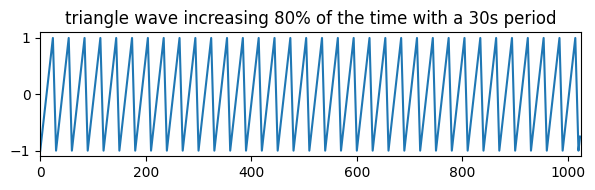

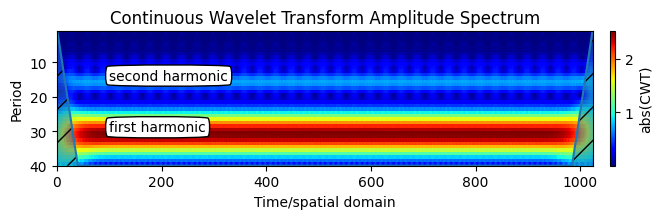

In [18]:
# build an asymetric triangle wave increasiong 80% of the time
import scipy.signal
ptri    = 30.0 # period in samples
raising = 0.8  # fraction of the period raising
triangle = scipy.signal.sawtooth(time/ptri*2*np.pi, raising)
scales = scg.periods2scales( np.arange(1, 40) )

# plot the signal 
fig1, ax1 = plt.subplots(1, 1, figsize=(6.2,2));  
lines = ax1.plot(triangle); 
ax1.set_xlim(0, len(time))
ax1.set_title("triangle wave increasing 80% of the time with a 30s period")
fig1.tight_layout()

# and the scaleogram
ax2 = scg.cws(triangle, scales=scales, figsize=(6.9,2.3)); 
txt = ax2.annotate("first harmonic", xy=(100, 30), bbox=dict(boxstyle="round4", fc="w"))
txt = ax2.annotate("second harmonic", xy=(100, 15), bbox=dict(boxstyle="round4", fc="w"))
plt.tight_layout()

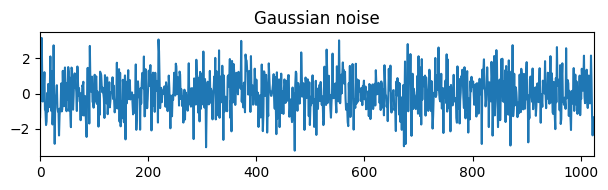

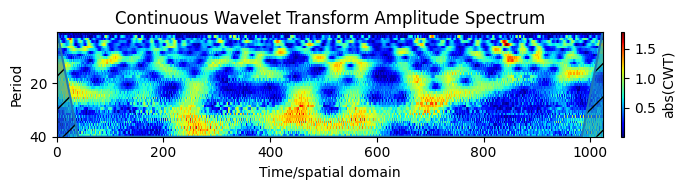

In [19]:
noise = np.random.randn(ns)
scales = scg.periods2scales( np.arange(1, 40) )


# plot the noise
fig1, ax1 = plt.subplots(1, 1, figsize=(6.2,2));  
ax1.set_title("Gaussian noise")
lines = ax1.plot(time, noise) 
ax1.set_xlim(0, ns)
fig1.tight_layout()

# and the scaleogram of noise
ax2 = scg.cws(noise, scales=scales, figsize=(7,2))
plt.tight_layout()

In [20]:
import pandas as pd
import statsmodels.api as sm


dir = "./data/"
cdf = pd.read_csv(dir+"data4columbia_credit.csv")
cdf.columns=['company','date','data']
cdf.date = pd.to_datetime(cdf.date)


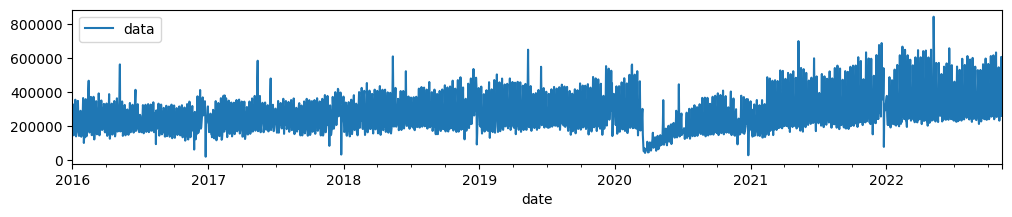

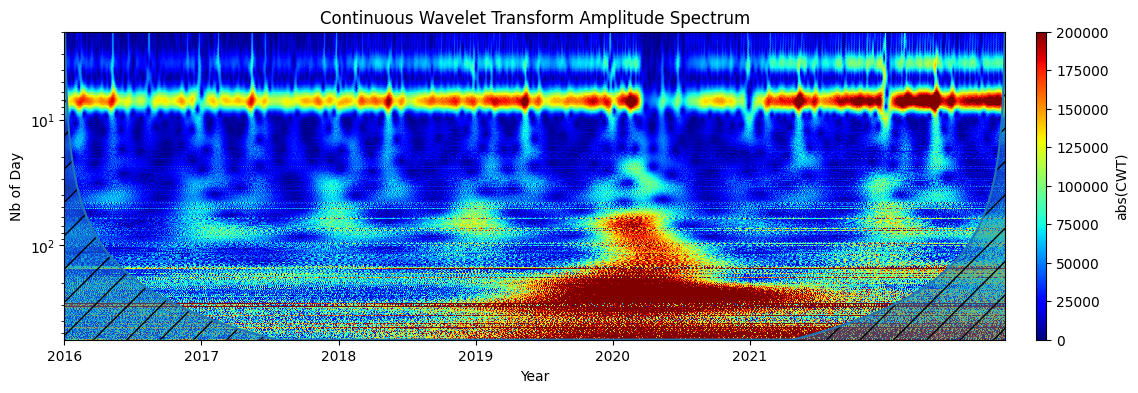

In [21]:

df = cdf[cdf.company==cdf.company.unique()[0]][['date','data']]

def set_x_yearly(ax, days, start_year=2016):
    xlim  = (np.round([0, days]) / 365).astype(np.int32)
    ticks = np.arange(xlim[0], xlim[1])
    ax.set_xticks(ticks*365)
    ax.set_xticklabels(start_year + ticks)

datetime_lim = [ df.date.min(), df.date.max() ] 
years_lim = [ df.date.min().year, df.date.max().year ]

ax = df.set_index('date').plot(figsize=(12, 2))


# use logaritmic spaced scales values when using log-Y-axis :-)
scales = scg.periods2scales(np.logspace(np.log10(2), np.log10(565), 500))

# store the CWT in an object to avoid recomputation for next plots
cwt = scg.CWT((df.data-df.data.mean()), scales=scales) 

ax  = scg.cws(cwt, figsize=(13.2, 4), xlabel="Year", ylabel="Nb of Day", 
             yscale='log', clim=(0,2e5))
set_x_yearly(ax, len(df))


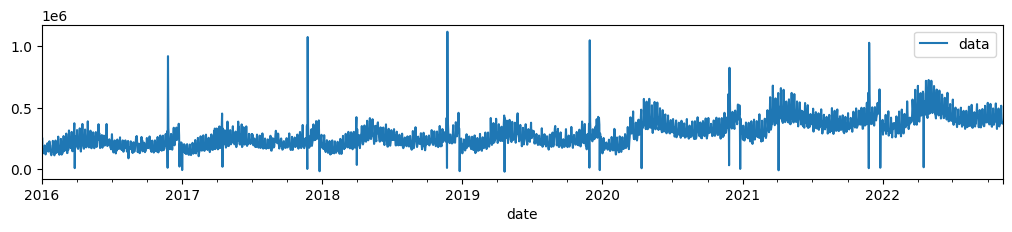

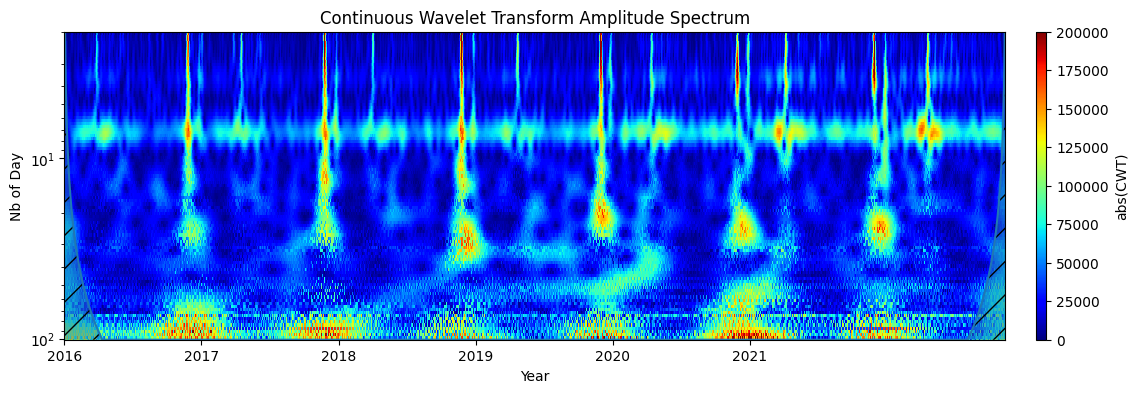

In [22]:

df = cdf[cdf.company==cdf.company.unique()[21]][['date','data']]

def set_x_yearly(ax, days, start_year=2016):
    xlim  = (np.round([0, days]) / 365).astype(np.int32)
    ticks = np.arange(xlim[0], xlim[1])
    ax.set_xticks(ticks*365)
    ax.set_xticklabels(start_year + ticks)

datetime_lim = [ df.date.min(), df.date.max() ] 
years_lim = [ df.date.min().year, df.date.max().year ]

ax = df.set_index('date').plot(figsize=(12.4 , 2))


# use logaritmic spaced scales values when using log-Y-axis :-)
scales = scg.periods2scales(np.logspace(np.log10(2), np.log10(100), 100))

# store the CWT in an object to avoid recomputation for next plots
cwt = scg.CWT(((df.data-df.data.mean())), scales=scales) 

ax  = scg.cws(cwt, figsize=(13.2, 4), xlabel="Year", ylabel="Nb of Day", 
             yscale='log', clim=(0,2e5))
set_x_yearly(ax, len(df))
